In [1]:
from model_stack import stack_models

# Create some models

In [2]:
import pandas as pd

# Classifiers
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Create generic dataset for classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold

# To compare models
from matplotlib import pyplot as plt
from numpy import mean
from numpy import std

/home/joseph/anaconda3/envs/kdd/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
# Create dummy regression dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

# Convert to pandas
X = pd.DataFrame(X)
y = pd.DataFrame(y)

#Rename column
y = y.rename(columns={0: 'target'})

# Split into validation set
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=42)

In [4]:
m1 = ('xgb', XGBClassifier(max_depth=1, verbosity=0, use_label_encoder=False))
m2 = ('xgb2', XGBClassifier(max_depth=5, learning_rate=.0001, verbosity=0, use_label_encoder=False))
m3 = ('knn', KNeighborsClassifier())
m4 = ('knn2', KNeighborsClassifier(n_neighbors=7, weights="distance"))
m5 = ('cart', DecisionTreeClassifier())
m6 = ('bayes', GaussianNB())

# Stack the models

In [5]:
# Create stacked model
stacked_model = stack_models(m1, m2, m3, m4, m5, m6, cv_folds=2, verbose=0)
stacked_model.fit(X_train, y_train.values.ravel())

/home/joseph/anaconda3/envs/kdd/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/joseph/anaconda3/envs/kdd/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/joseph/anaconda3/envs/kdd/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/joseph/anaconda3/envs/kdd/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.

StackingClassifier(cv=2,
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              enable_categorical=False,
                                              gamma=None, gpu_id=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=None, max_depth=1,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_const...
                          

In [6]:
#Creating a temporary dataframe so we can see how each of our models performed
temp = pd.DataFrame(y_val)

# The stacked models predictions, which should perform the best
temp['stacking_prediction'] = stacked_model.predict(X_val)

# Get each model in the stacked model to see how they individually perform
for m in stacked_model.named_estimators_:
        temp[m] = stacked_model.named_estimators_[m].predict(X_val)

In [7]:
# See how each of our models correlate with our target
# In most instances of running the program the stacked predictions should outperform any singular model
print("Correlations with target column")
print(temp.corr()['target'])

Correlations with target column
target                 1.000000
stacking_prediction    0.879699
xgb                    0.770964
xgb2                   0.668043
knn                    0.830204
knn2                   0.869783
cart                   0.709157
bayes                  0.750939
Name: target, dtype: float64


In [8]:
# See what our meta-learner is thinking (the logisitic regression)
print("Coeffecients of each specific model")
for coef in zip(stacked_model.named_estimators_, *stacked_model.final_estimator_.coef_):
    print(coef)

Coeffecients of each specific model
('xgb', 2.396637077605563)
('xgb2', 0.013694646098520613)
('knn', 2.808813139309198)
('knn2', 3.4409989373378416)
('cart', 0.7060247339473645)
('bayes', 0.13480721126365644)


In [9]:
# evaluate models using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# get the models to evaluate
models = {m[0] : m[1] for m in [m1, m2, m3, m4, m5, m6, ('stacked', stacked_model)]}

/home/joseph/anaconda3/envs/kdd/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/joseph/anaconda3/envs/kdd/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/joseph/anaconda3/envs/kdd/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/joseph/anaconda3/envs/kdd/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in

>xgb 0.867 (0.061)


/home/joseph/anaconda3/envs/kdd/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/joseph/anaconda3/envs/kdd/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/joseph/anaconda3/envs/kdd/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/joseph/anaconda3/envs/kdd/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.

>xgb2 0.790 (0.065)
>knn 0.880 (0.061)
>knn2 0.868 (0.074)
>cart 0.772 (0.084)
>bayes 0.858 (0.065)


/home/joseph/anaconda3/envs/kdd/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/joseph/anaconda3/envs/kdd/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/joseph/anaconda3/envs/kdd/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/joseph/anaconda3/envs/kdd/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.

>stacked 0.898 (0.068)


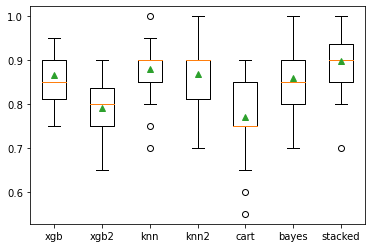

In [10]:
# evaluate the models and store results
results, names = list(), list()
for name, m in models.items():
	scores = evaluate_model(m, X_val, y_val.target.values.ravel())
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()